Load Data

In [1322]:
import pandas as pd
var = ['id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 
       'Duration', 'Purpose', 'Risk']

df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Periksa value null

In [1324]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [1325]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [1326]:
df.groupby("Risk").count()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Risk,,,,,,,,,,
bad,300,300,300,300,300,268,254,300,300,300
good,700,700,700,700,700,549,352,700,700,700


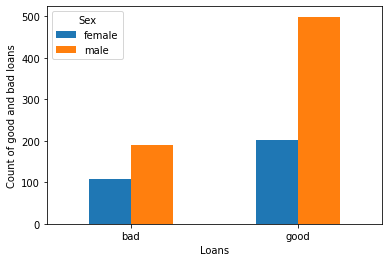

In [1327]:
import matplotlib.pyplot as plt

pd.crosstab(df["Risk"], df["Sex"]).plot.bar(rot=0)
plt.xlabel("Loans")
plt.ylabel("Count of good and bad loans")
plt.show()

Hapus kolom "Unnamed: 0"

In [1328]:
df.drop(columns="Unnamed: 0", inplace=True)

Hapus kolom "Checking account" karena nilai null nya melebihi 50%

In [1329]:
df.drop(columns="Checking account", inplace=True)

Sedangkan kolom "Saving acounts" di impute karena nilai null nya tidak terlalu banyak. nilai impute nya adalah nilai yang paling sering muncul dalam kolom tersebut

In [1330]:
df["Saving accounts"] = df["Saving accounts"].fillna(df["Saving accounts"].mode()[0])

In [1331]:
df["Purpose"].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [1332]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,1169,6,radio/TV,good
1,22,female,2,own,little,5951,48,radio/TV,bad
2,49,male,1,own,little,2096,12,education,good
3,45,male,2,free,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,4870,24,car,bad


In [1333]:
df.groupby("Risk").count()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
Risk,,,,,,,,
bad,300,300,300,300,300,300,300,300
good,700,700,700,700,700,700,700,700


In [1334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Mengubah nilai categorical menjadi nilai numerical

In [1335]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
categorical = ["Sex","Housing","Saving accounts","Purpose","Risk"]
new_df = df
for cat in categorical:
    lblCat = labelEnc.fit_transform(df[cat])
    new_df[cat] = lblCat
    
new_df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1169,6,5,1
1,22,0,2,1,0,5951,48,5,0
2,49,1,1,1,0,2096,12,3,1
3,45,1,2,0,0,7882,42,4,1
4,53,1,2,0,0,4870,24,1,0


In [1336]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1000 non-null   int64
 1   Sex              1000 non-null   int32
 2   Job              1000 non-null   int64
 3   Housing          1000 non-null   int32
 4   Saving accounts  1000 non-null   int32
 5   Credit amount    1000 non-null   int64
 6   Duration         1000 non-null   int64
 7   Purpose          1000 non-null   int32
 8   Risk             1000 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 50.9 KB


SMOTE

In [1337]:
x = new_df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
        'Duration', 'Purpose']]
y = new_df['Risk']

from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x,y)

In [1338]:
import numpy as np
print(np.count_nonzero(y_resampled == 0))
print(np.count_nonzero(y_resampled == 1))

700
700


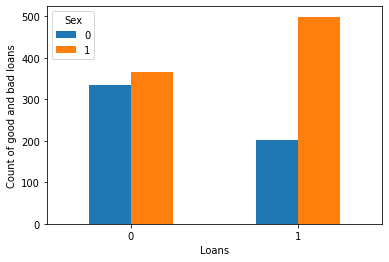

In [1339]:
pd.crosstab(y_resampled, x_resampled["Sex"]).plot.bar(rot=0)
plt.xlabel("Loans")
plt.ylabel("Count of good and bad loans")
plt.show()

In [1340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, 
                                                    random_state=42, stratify=y_resampled)

print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_test == 0))
print(np.count_nonzero(y_test == 1))

490
490
210
210


KNN

In [1341]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets 
knn.fit(X_train, y_train)

#Predict the response for test dataset
predictions  = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62       210
           1       0.61      0.56      0.58       210

    accuracy                           0.60       420
   macro avg       0.60      0.60      0.60       420
weighted avg       0.60      0.60      0.60       420



Random Forest

In [1342]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Model Training
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train);

#Prediction
predictions_rfc = model_rfc.predict(X_test)
probabilities = model_rfc.predict_proba(X_test)
print ("\n Classification report : \n",classification_report(y_test,predictions_rfc))


 Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76       210
           1       0.77      0.74      0.75       210

    accuracy                           0.76       420
   macro avg       0.76      0.76      0.76       420
weighted avg       0.76      0.76      0.76       420



Gaussian Naive Bayes

In [1343]:
from sklearn.naive_bayes import GaussianNB

#Model Training
model_nb = GaussianNB()
model_nb.fit(X_train, y_train);

# Model Prediction
predictions_NB = model_nb.predict(X_test)
probabilities = model_nb.predict_proba(X_test)

print ("\n Classification report : \n",classification_report(y_test,predictions_NB))
print ("Accuracy Score   : ",accuracy_score(y_test,predictions_NB))


 Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68       210
           1       0.68      0.61      0.64       210

    accuracy                           0.66       420
   macro avg       0.67      0.66      0.66       420
weighted avg       0.67      0.66      0.66       420

Accuracy Score   :  0.6642857142857143
[[151  59]
 [ 82 128]]
